In [2]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2
from clib.bellhop import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
bell = bellhop({'mediterrannee': '../SSP_4profils.mat'},name='cognac_cmap',rmax=100.)

---
# Choix des paramètres 

In [4]:
zs = 100.                   # profondeur de la source
Z = 2000.                   # profondeur totale

In [5]:
zr = 300.                   # profondeur du récepteur 
r  = 10000.                 # range du récepteur
zf = Z - zs - abs(zr - zs)  # profondeur entre récepteur et fond

---
# Calcul des réponses impulsionnelles

In [6]:
### Rayons définis quatre par quatre 
N = 10
DIST = []
for n in range (N) : 
    ray1 = (2*n+1)*Z - zf - zs
    ray2 = (2*n+1)*Z - zf + zs
    ray3 = (2*n+1)*Z + zf - zs
    ray4 = (2*n+1)*Z + zf + zs
    Rays = [ray1, ray2, ray3, ray4]
    
    for i in range (len(Rays)):
        teta = np.arctan (Rays[i]/r)
        R = r/np.cos(teta)
        DIST.append(R)

DIST = np.array(DIST)

In [7]:
### Conversion en temps avec profil célérité constant (1500m/s)
TIMES = DIST / 1500.

In [8]:
### Calcul des amplitudes (réflexions parfaites fond et surface)
alpha = 0.19 /1000.    # en dB/m
TL = 20*np.log10(DIST) + alpha * DIST
A = 10**(-TL/20.) 

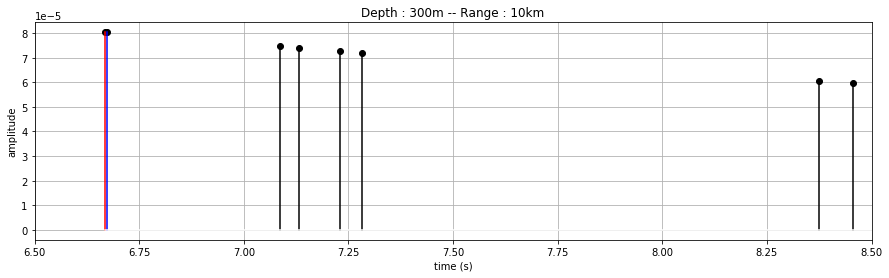

In [15]:
### PLOTS 
plt.figure(figsize=(15,4))
ax = plt.subplot(111)
markerline, stemlines, baseline = plt.stem(TIMES, A)
plt.setp(stemlines, color = 'k')
plt.setp(stemlines[0], color = 'r')
plt.setp(stemlines[1], color = 'b')
plt.setp(markerline, color = 'k')
plt.setp(baseline, color='w') 

ax.ticklabel_format(axis='y', style='scientific', scilimits=(-1, 2))
plt.title ('Depth : %dm -- Range : %.dkm' %(zr,r/1000.))
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim([6.5,8.5])
plt.grid()

---
# Toutes les réponses

In [10]:
### Choix des profondeurs et ranges

RD = np.array([100., 200., 300., 400.])
RR = np.array([10., 50., 90.]) * 1000.
print('Nombre total de réponses impulsionnelles : ', RD.size * RR.size)

Nombre total de réponses impulsionnelles :  12


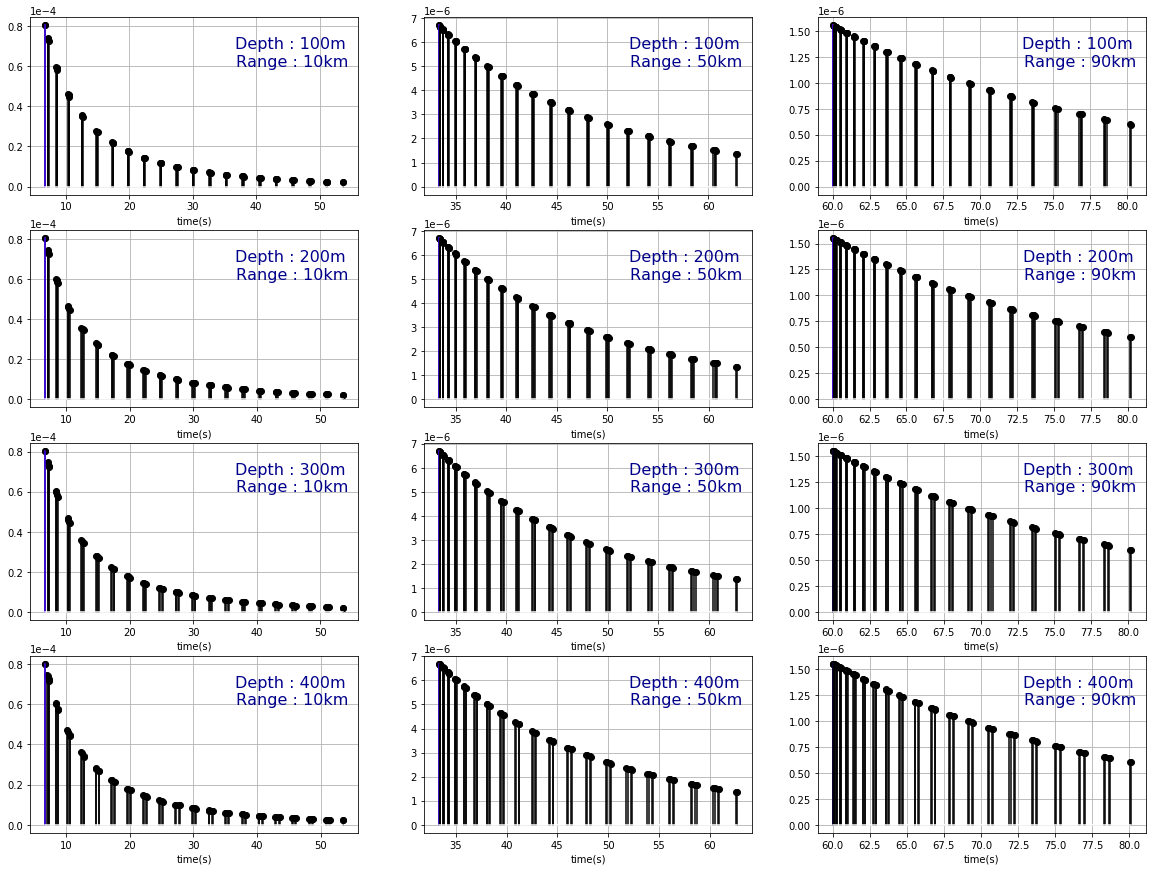

In [11]:
c = 1500.      # célérité (en m/s)
N = 20

TIMES_C = np.zeros((RD.size*RR.size, N*4))
DIST_C  = np.zeros((RD.size*RR.size, N*4))
AMP_C   = np.zeros((RD.size*RR.size, N*4))


Total_time = []
Dt_first = []
Dt_second = []

#D = np.array([300.])
#R = np.array([50000.])

plt.figure(figsize=(20,15))
k = 0
for i in range (RD.size):
    for j in range(RR.size):
        k+=1
        zr = RD[i]                   # profondeur du récepteur
        r  = RR[j]                   # range du récepteur
        zf = Z - zs - abs(zr - zs)  # profondeur entre récepteur et fond

        ###### Calcul de la réponse impulsionnelle
       
        DIST = []
        for n in range (N) : 
            ray1 = (2*n+1)*Z - zf - zs
            ray2 = (2*n+1)*Z - zf + zs
            ray3 = (2*n+1)*Z + zf - zs
            ray4 = (2*n+1)*Z + zf + zs
            Rays = [ray1, ray2, ray3, ray4]

            for m in range (len(Rays)):
                teta = np.arctan (Rays[m]/r)
                R = r/np.cos(teta)
                DIST.append(R)
                
        DIST = np.array(DIST)
        TIMES = DIST / c
        
        ##### Calcul des amplitudes

        alpha = 0.19 /1000.    # en dB/m
        TL = 20*np.log10(DIST) + alpha * DIST
        A = 10**(-TL/20.) 
        
        ##### Plot 
        
        ax = plt.subplot(RD.size,RR.size,k)
        markerline, stemlines, baseline = plt.stem(TIMES, A)
        plt.setp(stemlines, color = 'k')
        plt.setp(stemlines[0], color = 'r')
        plt.setp(stemlines[1], color = 'b')
        plt.setp(markerline, color = 'k')
        plt.setp(baseline, color='w')

        plt.text(0.8, 0.8,'Depth : %dm \nRange : %.dkm' %(zr,r/1000.), horizontalalignment='center',
             verticalalignment='center', transform = ax.transAxes, fontsize=16, color='darkblue')
        plt.xlabel('time(s)')
        #plt.title ('Depth : %dm -- Range : %.dkm' %(zr,r/1000.), fontsize=14, color='darkblue')
        ax.ticklabel_format(axis='y', style='scientific', scilimits=(-1, 2))
        
        plt.grid()

        Total_time.append(np.max(TIMES)-np.min(TIMES))
        sort = sorted(TIMES)
        Dt_first.append(sort[1] - sort[0])
        Dt_second.append(sort[2] - sort[1])

plt.show()     

---
### 1 - Etalement temporel total

In [12]:
n = RR.size
print('Etalement temporel total : \n')
print ('                    10km       50km       90km\n')
for i in range(RD.size) :  
    print('  Depth = %dm :   %.2fs     %.2fs     %.2fs' %(RD[i], Total_time[n*i], \
                                                                        Total_time[n*i+1], Total_time[n*i+2]))

Etalement temporel total : 

                    10km       50km       90km

  Depth = 100m :   47.08s     29.56s     20.28s
  Depth = 200m :   47.02s     29.50s     20.23s
  Depth = 300m :   46.95s     29.45s     20.19s
  Depth = 400m :   46.88s     29.39s     20.14s


### 2 - Intervalle de temps entre la 1ère et 2ème arrivée

In [15]:
print('Intervalle de temps entre la 1ère et 2ème arrivée : \n')
print ('                      10km         50km         90km\n')
for i in range(RD.size) :  
        print('  Depth = %dm :   %.3es   %.3es   %.3es ' %(RD[i], Dt_first[n*i], \
                                                                          Dt_first[n*i+1], Dt_first[n*i+2]))

Intervalle de temps entre la 1ère et 2ème arrivée : 

                      10km         50km         90km

  Depth = 100m :   1.333e-03s   2.667e-04s   1.481e-04s 
  Depth = 200m :   2.666e-03s   5.333e-04s   2.963e-04s 
  Depth = 300m :   3.998e-03s   8.000e-04s   4.444e-04s 
  Depth = 400m :   5.329e-03s   1.067e-03s   5.926e-04s 
